In [2]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Select dataset in 2 narratives and collecting data from PE

In [239]:
#pe12_select_dataset = requests.get('http://172.31.6.14:16000/metrics').json()
#with open('data/pe12_select_dataset.json', 'w') as f:
#    json.dump(pe12_select_dataset, f)

#pe13_select_dataset = requests.get('http://172.31.4.40:16000/metrics').json()
#with open('data/pe13_select_dataset.json', 'w') as f:
#    json.dump(pe13_select_dataset, f)

with open('data/pe12_select_dataset.json') as f:
    pe12_select_dataset = json.load(f)
    
with open('data/pe13_select_dataset.json') as f:
    pe13_select_dataset = json.load(f)

In [252]:
def collect(metrics, version):
    for command, timer in metrics['timers'].items():
        if command.startswith('com.adatao.pa.rest.CommandServlet'):
            record = {
                'version': version,
                'command': command.replace('com.adatao.pa.rest.CommandServlet.', '', 1)
            }
            for key in ('count', 'min', 'max', 'mean', 'p50', 'p95', 'stddev'):
                record[key] = timer[key]
            yield record
        
timers_select_dataset = list(collect(pe12_select_dataset, '1.4.12')) + list(collect(pe13_select_dataset, '1.4.13'))
df_select_dataset = pd.DataFrame(timers_select_dataset)
df_select_dataset.head()

,command,count,max,mean,min,p50,p95,stddev,version
0,nrow,2,1.710807,0.406138,0.173682,0.173682,1.710807,0.550708,1.4.12
1,geturi,4,0.039999,0.029472,0.023033,0.033591,0.039999,0.005802,1.4.12
2,getddf,6,4.782692,0.274596,0.036410,0.036513,0.060302,1.031747,1.4.12
3,getauthenticateddatasources,3,0.355733,0.022008,0.001207,0.001207,0.355733,0.082236,1.4.12
4,quicksummary,2,0.177638,0.141873,0.135501,0.135501,0.177638,0.015097,1.4.12


# Difference in no. calls between 1.4.12 and 1.4.13 when select dataset

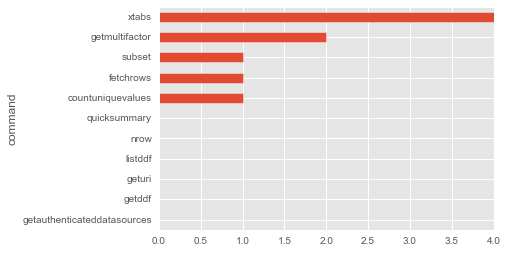

In [244]:
pe12_data_select_dataset = df_select_dataset[df_select_dataset.version == '1.4.12'].set_index('command')
pe13_data_select_dataset = df_select_dataset[df_select_dataset.version == '1.4.13'].set_index('command')

# divide by 2 since we tried 2 times
count_diff = pe13_data_select_dataset['count'].subtract(pe12_data_select_dataset['count'], fill_value=0) / 2
count_diff.sort_values().plot.barh()

**So in 1.4.13 BA call 4 more xtabs, 2 getmultifactor, 1 subset, 1 fetch rows and 1 countuniquevalues when selecting a dataset.**

# Average API call time comparison between 1.4.12 and 1.4.13

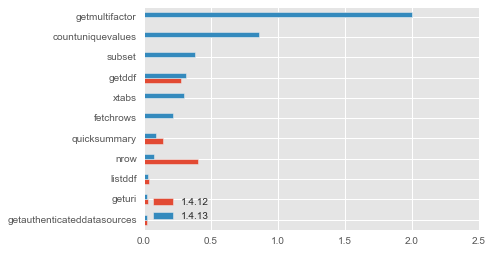

In [245]:
mean_compare = pd.concat([pe12_data_select_dataset['mean'], pe13_data_select_dataset['mean']], axis=1)
mean_compare.columns = ['1.4.12', '1.4.13']
mean_compare.sort_values('1.4.13').plot.barh()

# Run "top company by profits" twice in each version and collect data from PE again

In [259]:
#pe12_top_company_by_profits = requests.get('http://172.31.6.14:16000/metrics').json()
#with open('data/pe12_top_company_by_profits.json', 'w') as f:
#    json.dump(pe12_top_company_by_profits, f)
    
#pe13_top_company_by_profits = requests.get('http://172.31.4.40:16000/metrics').json()
#with open('data/pe13_top_company_by_profits.json', 'w') as f:
#    json.dump(pe13_top_company_by_profits, f)

with open('data/pe12_top_company_by_profits.json') as f:
    pe12_top_company_by_profits = json.load(f)
    
with open('data/pe13_top_company_by_profits.json') as f:
    pe13_top_company_by_profits = json.load(f)

In [260]:
timers_top_company_by_profits = list(collect(pe12_top_company_by_profits, '1.4.12')) + list(collect(pe13_top_company_by_profits, '1.4.13'))
print len(timers_top_company_by_profits)
df_top_company_by_profits = pd.DataFrame(timers_top_company_by_profits)
df_top_company_by_profits.head()

8


,command,count,max,mean,min,p50,p95,stddev,version
0,connect,1,0.150492,0.150492,0.150492,0.150492,0.150492,0.000000,1.4.12
1,getddf,3,5.290413,0.505857,0.034708,0.034708,5.290413,1.492402,1.4.12
2,groupby,2,3.126548,1.131570,0.344445,0.344445,3.126548,1.253115,1.4.12
3,topn,2,7.078297,2.343117,0.236634,0.236634,7.078297,3.158255,1.4.12
4,connect,1,0.149564,0.149564,0.149564,0.149564,0.149564,0.000000,1.4.13


# There are no difference between 1.4.12 and 1.4.13.1 in term of number of API calls to PE

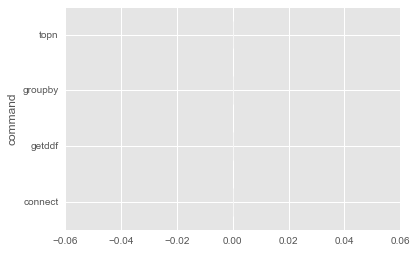

In [261]:
pe12_data_top_company_by_profits = df_top_company_by_profits[df_top_company_by_profits.version == '1.4.12'].set_index('command')
pe13_data_top_company_by_profits = df_top_company_by_profits[df_top_company_by_profits.version == '1.4.13'].set_index('command')

# difference in no. calls between 1.4.12 and 1.4.13
count_diff = pe13_data_top_company_by_profits['count'].subtract(pe12_data_top_company_by_profits['count'], fill_value=0)
count_diff.sort_values().plot.barh()

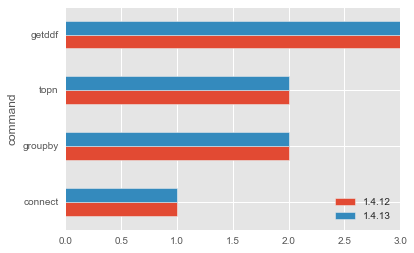

In [262]:
count_compare = pd.concat([pe12_data_top_company_by_profits['count'], pe13_data_top_company_by_profits['count']], axis=1)
count_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
count_compare.sort_values('1.4.13').plot.barh()

# On average PE 1.4.13 is slower than 1.4.12 but only by a very small margin

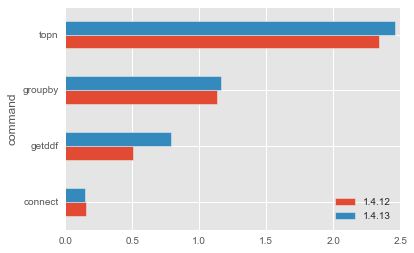

In [264]:
mean_compare = pd.concat([pe12_data_top_company_by_profits['mean'], pe13_data_top_company_by_profits['mean']], axis=1)
mean_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
mean_compare.sort_values('1.4.13').plot.barh()

# Grab SQ running time from testbot report

In [270]:
import re

def parse_time(time_str):
    match = re.match('(\d\d):([\d.]+)', time_str)
    if match:
        return 60 * int(match.group(1)) + float(match.group(2))

def parse_report(path):
    with open(path) as f:
        html = f.read()
    for dataset, query, time in re.findall(r'dataset: ([a-z\d_]+).*?query: ([\w\- ]+).*?query time: ([\d:.]+)', html, flags=re.IGNORECASE):
        seconds = parse_time(time)
        yield dataset, query, seconds

report = []
for path in ('data/testbot_report1.12.html', 'data/testbot_report2.12.html', 'data/testbot_report3.12.html'):
    for dataset, query, seconds in parse_report(path):
        report.append(dict(dataset=dataset, query=query, time=seconds, version='1.4.12.3'))
for path in ('data/testbot_report1.13.html', 'data/testbot_report2.13.html', 'data/testbot_report3.13.html'):
    for dataset, query, seconds in parse_report(path):
        report.append(dict(dataset=dataset, query=query, time=seconds, version='1.4.13.1'))
df = pd.DataFrame(report)

# remove query executed in dashboard
df = df[df['query'] != 'sales by sector']
df = df[df['query'] != 'top company by profits']
df = df[np.logical_not((df['query'] == 'show data table') & (df['dataset'] == 'forbes'))]
df

,dataset,query,time,version
0,forbes,show relationship between assets and continent...,3.45,1.4.12.3
1,forbes,show distribution of continent,2.14,1.4.12.3
2,forbes,sector vs sales,2.69,1.4.12.3
3,forbes,show first 10 rows of data,2.25,1.4.12.3
4,forbes,describe assets,2.28,1.4.12.3
5,forbes,summary statistics,2.30,1.4.12.3
6,forbes,show value of number_of_rows,2.28,1.4.12.3
7,forbes,max of profits,2.30,1.4.12.3
8,forbes,min of sales,2.28,1.4.12.3
9,forbes,what is the average of rank,2.31,1.4.12.3


# In general, the average time is similar between 2 versions

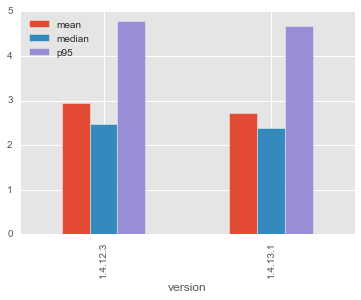

In [267]:
def p95(arr):
    return np.percentile(arr, 95)

df.groupby('version').agg({'time': [np.mean, np.median, p95]})['time'].plot.bar()

## With only `summary statistic` show a clear slow down

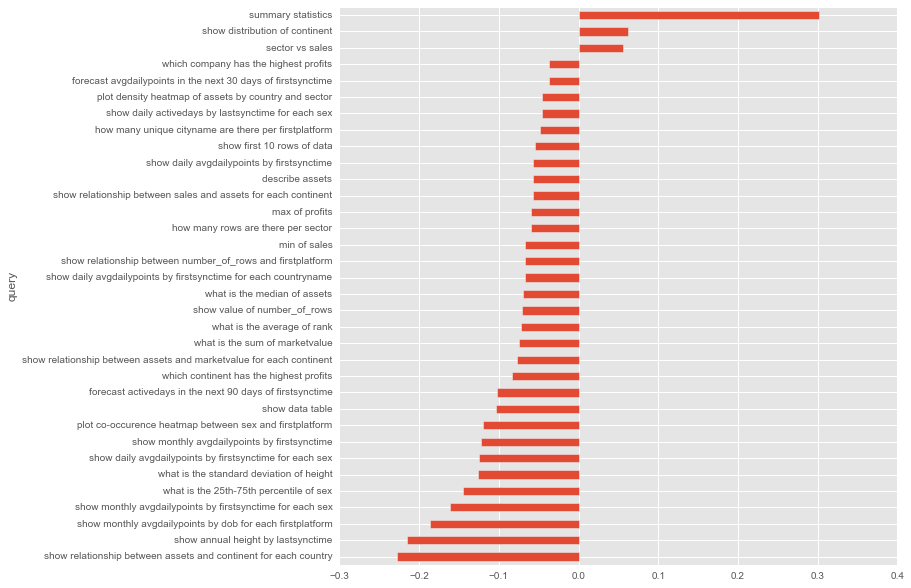

In [268]:
v12_mean = df[df['version'] == '1.4.12.3'].groupby('query').mean()
v13_mean = df[df['version'] == '1.4.13.1'].groupby('query').mean()

mean_diff = (v13_mean['time'] - v12_mean['time']) / v12_mean['time']
plt.figure(figsize=(10,10))
mean_diff.sort_values().plot.barh()

# But connect to dataset show a clear slowdown between 2 versions

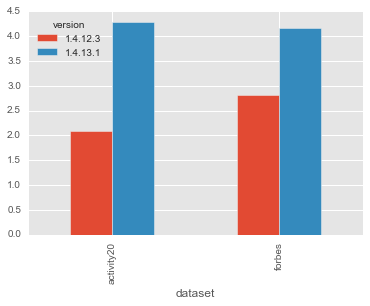

In [274]:
def parse_report_connect_time(path):
    with open(path) as f:
        html = f.read()
    for dataset, time in re.findall(r'connect to dataset ([a-z0-9_]+): ([\d:.]+)', html, flags=re.IGNORECASE):
        seconds = parse_time(time)
        yield dataset, seconds

report = []
for path in ('data/testbot_report1.12.html', 'data/testbot_report2.12.html', 'data/testbot_report3.12.html'):
    for dataset, seconds in parse_report_connect_time(path):
        report.append(dict(dataset=dataset, time=seconds, version='1.4.12.3'))
for path in ('data/testbot_report1.13.html', 'data/testbot_report2.13.html', 'data/testbot_report3.13.html'):
    for dataset, seconds in parse_report_connect_time(path):
        report.append(dict(dataset=dataset, time=seconds, version='1.4.13.1'))
connect_df = pd.DataFrame(report)

# removing the 2 1st-time connect for each run because that including the ddf restore time
connect_df = connect_df[connect_df.time < 6]

grp = connect_df.groupby(['version', 'dataset']).mean()
grp.unstack('version')['time'].plot.bar()

# Compare SQ running time as measured by testbot and

In [277]:
import pickle
with open('data/telemetry.nrt.sq.exec.pkl') as f:
    nrt_sq_exec_telemetry = pickle.load(f)

df1 = nrt_sq_exec_telemetry[['code', 'dataset', 'version', 'totalDuration']]
df1.columns = ['query', 'dataset', 'version', 'time_telemetry']
df1 = df1.groupby(['version', 'dataset', 'query']).mean() / 1000

df2 = df[['query', 'dataset', 'time', 'version']]
df2.columns = ['query', 'dataset', 'time_testbot', 'version']
df2 = df2.groupby(['version', 'dataset', 'query']).mean()

df1['time_testbot'] = df2['time_testbot']
df1

time_telemetry  \
version  dataset    query                                                                
1.4.12.3 activity20 forecast activedays in the next 90 days of firs...        3.921333   
                    forecast avgdailypoints in the next 30 days of ...        2.912333   
                    how many unique cityname are there per firstpla...        5.017667   
                    plot co-occurence heatmap between sex and first...        1.873333   
                    show annual height by lastsynctime                        1.869000   
                    show daily activedays by lastsynctime for each sex        1.822333   
                    show daily avgdailypoints by firstsynctime                1.638000   
                    show daily avgdailypoints by firstsynctime for ...        3.807333   
                    show daily avgdailypoints by firstsynctime for ...        2.376000   
                    show data table                                           1.018667   
                    show monthly avgdailypoints by dob for each fir...        2.306000   
                    show monthly avgdailypoints by firstsynctime              1.937333   
                    show monthly avgdailypoints by firstsynctime fo...        1.987000   
                    show relationship between number_of_rows and fi...        1.234000   
                    what is the 25th-75th percentile of sex                   1.881667   
                    what is the standard deviation of height                  1.670333   
         forbes     describe assets                                           0.454667   
                    how many rows are there per sector                        0.699333   
                    max of profits                                            0.464667   
                    min of sales                                              0.466000   
                    plot density heatmap of assets by country and s...        1.544333   
                    sector vs sales                                           1.140000   
                    show distribution of continent                            0.572000   
                    show first 10 rows of data                                0.524667   
                    show relationship between assets and continent ...        1.401667   
                    show relationship between assets and marketvalu...        0.835000   
                    show relationship between sales and assets for ...        0.864000   
                    show value of number_of_rows                              0.503000   
                    summary statistics                                        0.466667   
                    what is the average of rank                               0.491667   
...                                                                                ...   
1.4.13.1 activity20 show annual height by lastsynctime                        1.688000   
                    show daily activedays by lastsynctime for each sex        1.627667   
                    show daily avgdailypoints by firstsynctime                1.469333   
                    show daily avgdailypoints by firstsynctime for ...        3.556333   
                    show daily avgdailypoints by firstsynctime for ...        1.985667   
                    show data table                                           0.751333   
                    show monthly avgdailypoints by dob for each fir...        1.899000   
                    show monthly avgdailypoints by firstsynctime              1.724000   
                    show monthly avgdailypoints by firstsynctime fo...        1.804000   
                    show relationship between number_of_rows and fi...        1.079333   
                    what is the 25th-75th percentile of sex                   1.494333   
                    what is the standard deviation of height                  1.236667   
         forbes     de

R^2 = 0.925813
Y = 0.756701 X + 1.725306


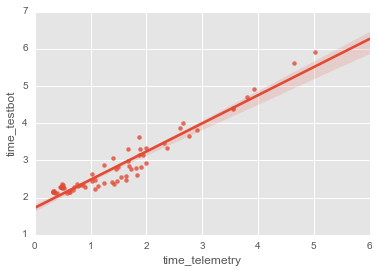

In [278]:
from sklearn.linear_model import LinearRegression

X = df1[['time_telemetry']].values
y = df1['time_testbot'].values
lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(X, y)
predicted = lr.predict(X)

print 'R^2 = %f' % lr.score(X, y)
print 'Y = %f X + %f' % (lr.coef_, lr.intercept_)
sns.regplot(x='time_telemetry', y='time_testbot', data=df1)